In [2]:
# notebook configuration
%matplotlib inline

import os 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from IPython.display import Image

# define general parameters for plots
plt.rcParams["figure.figsize"] = (12.0, 8.0)

In [3]:
#Experimental data
case1_final_velocity = 2.179 #m/s
case2_final_velocity = 3.28 #m/s
case3_final_velocity = 4.358 #m/s

case1_exp = 686.199656 #Pa
case2_exp = 645.039874 #Pa
case3_exp = 500.417202 #Pa

exp_minimum_fluid_velocity = 1.05 #m/s

cross_sectional_area = 0.23*0.076

total_particle_mass = 1.9 #kg
total_particle_weight = total_particle_mass*9.81
weight_per_area = total_particle_weight/cross_sectional_area

In [4]:
# Case 1 - No distributor - 

# loading the simulation data

simulation_data = open("case1-alpha12-standard-ratio4-pressure_point1.out", 'r')
i1, case1_time_point1_alpha12, case1_pressure_point1_alpha12 = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 3, unpack = True)
simulation_data.close()

simulation_data = open("pressure_point1_john.out", 'r')
i1_john, case1_time_point1_alpha12_john, case1_pressure_point1_alpha12_john = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 3, unpack = True)
simulation_data.close()

simulation_data = open("case1-alpha12-improved-ratio4-pressure_point1.out", 'r')
i2, case1_time_point1_alpha12i, case1_pressure_point1_alpha12i = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 3, unpack = True)
simulation_data.close()

simulation_data = open("pressure_improved_point1.out", 'r')
i3, case1_time_point1_alpha12i_new, case1_pressure_point1_alpha12i_new = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 3, unpack = True)
simulation_data.close()

simulation_data = open("case1-alpha12-standard-ratio4-pressure_point2.out", 'r')
i4, case1_time_point2_alpha12, case1_pressure_point2_alpha12 = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 3, unpack = True)
simulation_data.close()

simulation_data = open("pressure_point2_john.out", 'r')
i2_john, case1_time_point2_alpha12_john, case1_pressure_point2_alpha12_john = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 3, unpack = True)
simulation_data.close()

simulation_data = open("case1-alpha12-improved-ratio4-pressure_point2.out", 'r')
i5, case1_time_point2_alpha12i, case1_pressure_point2_alpha12i = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 3, unpack = True)
simulation_data.close()

simulation_data = open("pressure_improved_point2.out", 'r')
i6, case1_time_point2_alpha12i_new, case1_pressure_point2_alpha12i_new = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 3, unpack = True)
simulation_data.close()

simulation_data = open("velocity-inlet_alpha12.out", 'r')
i7, case1_time_point1_alpha12_vel, case1_velocity_alpha12 = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 3, unpack = True)
simulation_data.close()

simulation_data = open("velocity-inlet_john.out", 'r')
i7_john, case1_time_point1_alpha12_vel_john, case1_velocity_alpha12_john = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 3, unpack = True)
simulation_data.close()

simulation_data = open("velocity-inlet_alpha12_i.out", 'r')
i8, case1_time_point1_alpha12i_vel, case1_velocity_alpha12i = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 3, unpack = True)
simulation_data.close()

simulation_data = open("velocity-inlet_improved2.out", 'r')
i9, case1_time_point1_alpha12i_vel_new, case1_velocity_alpha12i_new = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 3, unpack = True)
simulation_data.close()



# Case 2 - No distributor - 

# loading the simulation data

simulation_data = open("case2_pressure_point1_alpha11.out", 'r')
c21, case2_time_point1_alpha11, case2_pressure_point1_alpha11 = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 3, unpack = True)
simulation_data.close()

simulation_data = open("case2_pressure_point2_alpha11.out", 'r')
c22, case2_time_point2_alpha11, case2_pressure_point2_alpha11 = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 3, unpack = True)
simulation_data.close()

simulation_data = open("case2_velocity-inlet_alpha11.out", 'r')
c2v, case2_time_point1_alpha11, case2_velocity_alpha11 = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 3, unpack = True)
simulation_data.close()

# Case 3 - No distributor - 

# loading the simulation data

simulation_data = open("case3_pressure_point1_alpha11.out", 'r')
c31, case3_time_point1_alpha11, case3_pressure_point1_alpha11 = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 3, unpack = True)
simulation_data.close()

simulation_data = open("case3_pressure_point2_alpha11.out", 'r')
c32, case3_time_point2_alpha11, case3_pressure_point2_alpha11 = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 3, unpack = True)
simulation_data.close()

simulation_data = open("case3_velocity-inlet_alpha11.out", 'r')
c3v, case3_time_point1_alpha11, case3_velocity_alpha11 = np.loadtxt(simulation_data, delimiter = ' ', skiprows = 3, unpack = True)
simulation_data.close()


In [5]:
# case1_pressure_drop = case1_pressure_point1 - case1_pressure_point2
# case1_alpha_pressure_drop = case1_pressure_point1_alpha11 - case1_pressure_point2_alpha11
case1_alpha12_pressure_drop = case1_pressure_point1_alpha12 - case1_pressure_point2_alpha12
case1_alpha12_pressure_drop_john = case1_pressure_point1_alpha12_john - case1_pressure_point2_alpha12_john
case1_alpha12_pressure_dropi = case1_pressure_point1_alpha12i - case1_pressure_point2_alpha12i
case1_alpha12_pressure_dropi_new = case1_pressure_point1_alpha12i_new - case1_pressure_point2_alpha12i_new

case2_pressure_drop = case2_pressure_point1 - case2_pressure_point2
case2_alpha_pressure_drop = case2_pressure_point1_alpha11 - case2_pressure_point2_alpha11
case3_pressure_drop = case3_pressure_point1 - case3_pressure_point2
case3_alpha_pressure_drop = case3_pressure_point1_alpha11 - case3_pressure_point2_alpha11


case1_exp_pressure_drop  = np.full(case1_alpha12_pressure_drop.shape, case1_exp)
case2_exp_pressure_drop  = np.full(case2_alpha_pressure_drop.shape, case2_exp)
case3_exp_pressure_drop  = np.full(case3_alpha_pressure_drop.shape, case3_exp)

case1_alpha12_t_min_fluid_velocity = case1_time_point1_alpha12[np.argmax(case1_velocity_alpha12>exp_minimum_fluid_velocity)]
case1_alpha12_t_min_fluid_velocity_john = case1_time_point1_alpha12_john[np.argmax(case1_velocity_alpha12_john>exp_minimum_fluid_velocity)]
case1_alpha12i_t_min_fluid_velocity = case1_time_point2_alpha12i[np.argmax(case1_velocity_alpha12i>exp_minimum_fluid_velocity)]
case1_alpha12i_t_min_fluid_velocity_new = case1_time_point1_alpha12i_vel_new[np.argmax(case1_velocity_alpha12i_new>exp_minimum_fluid_velocity)]

case2_t_min_fluid_velocity = case2_time_point1[np.argmax(case2_velocity>exp_minimum_fluid_velocity)]
case2_alpha11_t_min_fluid_velocity = case2_time_point1_alpha11[np.argmax(case2_velocity_alpha11>exp_minimum_fluid_velocity)]

case3_t_min_fluid_velocity = case3_time_point1[np.argmax(case3_velocity>exp_minimum_fluid_velocity)]
case3_alpha11_t_min_fluid_velocity = case3_time_point1_alpha11[np.argmax(case3_velocity_alpha11>exp_minimum_fluid_velocity)]

print(case1_alpha12_t_min_fluid_velocity, case1_alpha12_t_min_fluid_velocity_john, case1_alpha12i_t_min_fluid_velocity, case1_alpha12i_t_min_fluid_velocity_new)
print(case2_t_min_fluid_velocity, case2_alpha11_t_min_fluid_velocity)
print( case3_t_min_fluid_velocity, case3_alpha11_t_min_fluid_velocity)

NameError: name 'case2_pressure_point1' is not defined

In [ ]:
#calculating mean pressure drop


limited_time_case1_alpha12 = case1_time_point1_alpha12[np.argmax(case1_velocity_alpha12>case1_final_velocity):]
limited_time_case1_alpha12_john = case1_time_point1_alpha12_john[np.argmax(case1_velocity_alpha12_john>case1_final_velocity):]
limited_time_case1_alpha12i = case1_time_point1_alpha12i[np.argmax(case1_velocity_alpha12i>case1_final_velocity):]
limited_time_case1_alpha12i_new = case1_time_point1_alpha12i_new[np.argmax(case1_velocity_alpha12i_new>case1_final_velocity):]

limited_pressure_case1_alpha12 = case1_alpha12_pressure_drop[np.argmax(case1_velocity_alpha12>case1_final_velocity):]
limited_pressure_case1_alpha12_john = case1_alpha12_pressure_drop_john[np.argmax(case1_velocity_alpha12_john>case1_final_velocity):]
limited_pressure_case1_alpha12i = case1_alpha12_pressure_dropi[np.argmax(case1_velocity_alpha12i>case1_final_velocity):]
limited_pressure_case1_alpha12i_new = case1_alpha12_pressure_dropi_new[np.argmax(case1_velocity_alpha12i_new>case1_final_velocity):]


limited_time_case2 = case2_time_point2[np.argmax(case2_velocity>case2_final_velocity):]
limited_time_case2_alpha11 = case2_time_point2_alpha11[np.argmax(case2_velocity_alpha11>case2_final_velocity):]
limited_pressure_case2 = case2_pressure_drop[np.argmax(case2_velocity>case2_final_velocity):]
limited_pressure_case2_alpha11 = case2_alpha_pressure_drop[np.argmax(case2_velocity_alpha11>case2_final_velocity):]

limited_time_case3 = case3_time_point1[np.argmax(case3_velocity>case3_final_velocity):]
limited_pressure_case3 = case3_pressure_drop[np.argmax(case3_velocity>case3_final_velocity):]
limited_time_case3_alpha11 = case3_time_point1_alpha11[np.argmax(case3_velocity_alpha11>case3_final_velocity):]
limited_pressure_case3_alpha11 = case3_alpha_pressure_drop[np.argmax(case3_velocity_alpha11>case3_final_velocity):]


case1_mean_pressure_drop_alpha12=np.mean(limited_pressure_case1_alpha12)
case1_mean_pressure_drop_alpha12_john=np.mean(limited_pressure_case1_alpha12_john)
case1_mean_pressure_drop_alpha12i=np.mean(limited_pressure_case1_alpha12i)
case1_mean_pressure_drop_alpha12i_new=np.mean(limited_pressure_case1_alpha12i_new)
case2_mean_pressure_drop=np.mean(limited_pressure_case2)
case2_mean_pressure_drop_alpha11=np.mean(limited_pressure_case2_alpha11)
case3_mean_pressure_drop=np.mean(limited_pressure_case3)
case3_mean_pressure_drop_alpha11=np.mean(limited_pressure_case3_alpha11)

print(case1_exp, case1_mean_pressure_drop_alpha12, case1_mean_pressure_drop_alpha12_john, case1_mean_pressure_drop_alpha12i, case1_mean_pressure_drop_alpha12i_new)

# error_case1 = (case1_exp-case1_mean_pressure_drop)/case1_mean_pressure_drop
error_case1_alpha12 = (case1_exp-case1_mean_pressure_drop_alpha12)/case1_mean_pressure_drop_alpha12
error_case1_alpha12i = (case1_exp-(case1_mean_pressure_drop_alpha12i_new+20))/case1_mean_pressure_drop_alpha12i_new
error_case2 = (case2_exp-case2_mean_pressure_drop)/case2_mean_pressure_drop
error_case2_alpha11 = (case2_exp-case2_mean_pressure_drop_alpha11)/case2_mean_pressure_drop_alpha11
error_case3 = (case3_exp-case3_mean_pressure_drop)/case3_mean_pressure_drop
error_case3_alpha11 = (case3_exp-case3_mean_pressure_drop_alpha11)/case3_mean_pressure_drop_alpha11

print(error_case1_alpha12, error_case1_alpha12i)
print(error_case2, error_case2_alpha11)
print(error_case3, error_case2_alpha11)


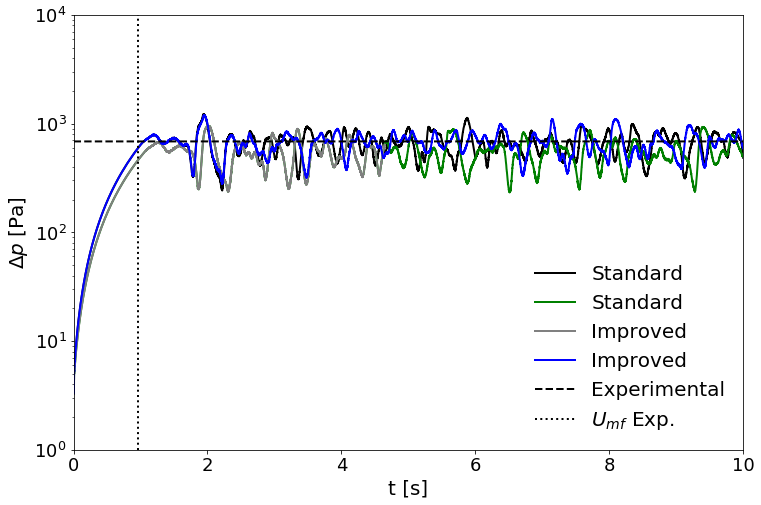

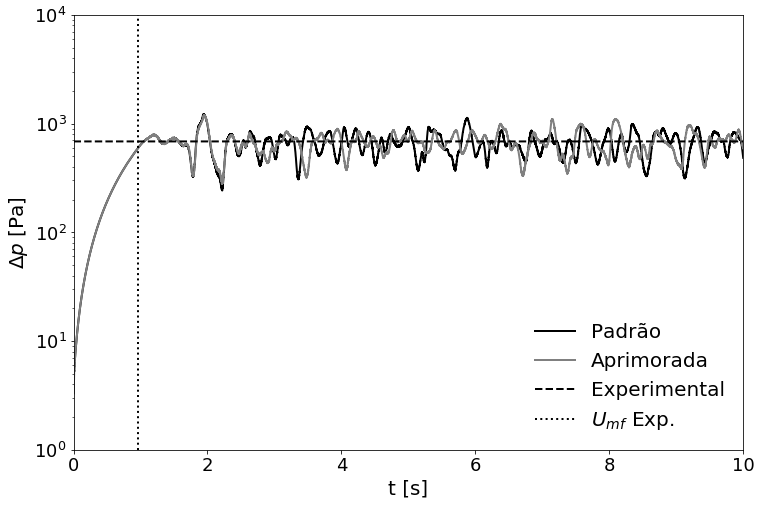

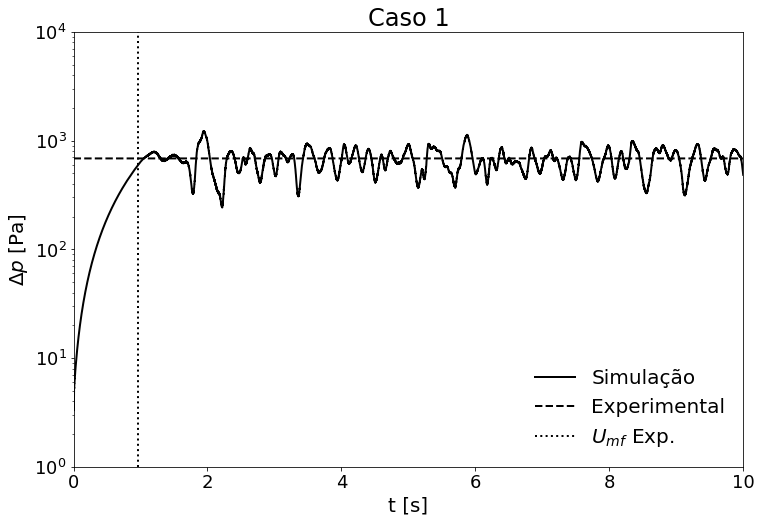

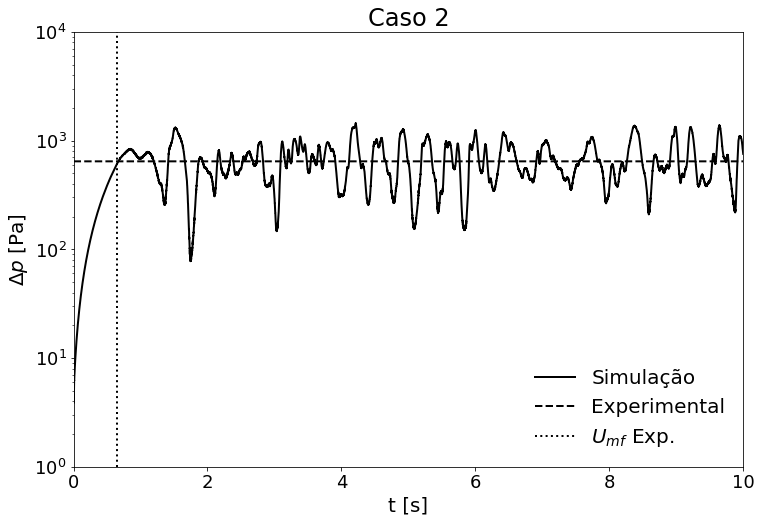

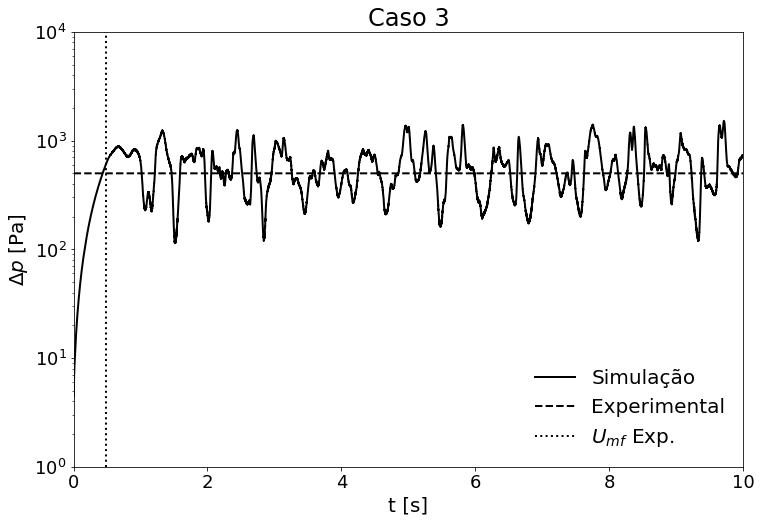

In [28]:
#Plotting

#pressure drop

#Case 1 

plt.semilogy(case1_time_point1_alpha12, case1_alpha12_pressure_drop, linestyle = "-", linewidth = 2, color = "black", label = u"Standard")
plt.semilogy(case1_time_point1_alpha12_john, case1_alpha12_pressure_drop_john, linestyle = "-", linewidth = 2, color = "green", label = u"Standard")
plt.semilogy(case1_time_point1_alpha12i, case1_alpha12_pressure_dropi, linestyle = "-", linewidth = 2, color = "grey", label = u"Improved")
plt.semilogy(case1_time_point1_alpha12i_new, case1_alpha12_pressure_dropi_new, linestyle = "-", linewidth = 2, color = "blue", label = u"Improved")
plt.semilogy(case1_time_point1_alpha12, case1_exp_pressure_drop, color = "black",  linestyle = "--", linewidth = 2, label = u"Experimental")
plt.axvline(case1_alpha12_t_min_fluid_velocity,  color = "black",  linestyle = ":", linewidth = 2, label = u"$U_{mf}$ Exp.")
#plt.title("Caso 1", fontsize = 24)
plt.xlabel("t [s]", fontsize = 20)
plt.ylabel("$\\Delta p$ [Pa]", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 20, frameon = False, loc = 4)
plt.xlim(0, 10)     
plt.ylim(1e0, 1e4)  
#plt.savefig('Case1_pressure_drop.png')
plt.show()

#Case 1 

plt.semilogy(case1_time_point1_alpha12, case1_alpha12_pressure_drop, linestyle = "-", linewidth = 2, color = "black", label = u"Padrão")
plt.semilogy(case1_time_point1_alpha12i_new, case1_alpha12_pressure_dropi_new, linestyle = "-", linewidth = 2, color = "grey", label = u"Aprimorada")
plt.semilogy(case1_time_point1_alpha12, case1_exp_pressure_drop, color = "black",  linestyle = "--", linewidth = 2, label = u"Experimental")
plt.axvline(case1_alpha12_t_min_fluid_velocity,  color = "black",  linestyle = ":", linewidth = 2, label = u"$U_{mf}$ Exp.")
#plt.title("Caso 1", fontsize = 24)
plt.xlabel("t [s]", fontsize = 20)
plt.ylabel("$\\Delta p$ [Pa]", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 20, frameon = False, loc = 4)
plt.xlim(0, 10)     
plt.ylim(1e0, 1e4)  
plt.savefig('Case1_pressure_drop_standard_improved.png')
plt.show()


# plt.plot(case1_time_point1_alpha12, case1_alpha12_pressure_drop, linestyle = "-", linewidth = 2, color = "black", label = u"Numerical")
# plt.plot(case1_time_point1, np.full(case1_time_point1.shape, case1_mean_pressure_drop_alpha12), color = "grey",  linestyle = "-", linewidth = 2, label = u"Average - Numerical")
# plt.plot(case1_time_point1, case1_exp_pressure_drop, color = "black",  linestyle = "--", linewidth = 2, label = u"Average - Experimental")
# plt.axvline(case1_t_min_fluid_velocity,  color = "black",  linestyle = ":", linewidth = 2, label = u"$U_{mf}$ Exp.")
# #plt.title("Caso 1", fontsize = 24)
# plt.xlabel("t [s]", fontsize = 20)
# plt.ylabel("$\\Delta p$ [Pa]", fontsize = 20)
# plt.xticks(fontsize = 18)
# plt.yticks(fontsize = 18)
# plt.legend(fontsize = 20, frameon = False, loc = 4)
# plt.xlim(0, 10)     
# #plt.ylim(1e0, 1e4)  
# plt.show()


#Case 1 

plt.semilogy(case1_time_point1_alpha12, case1_alpha12_pressure_drop, linestyle = "-", linewidth = 2, color = "black", label = u"Simulação")
#plt.semilogy(case2_time_point1_alpha11, case2_alpha_pressure_drop, linestyle = "-.", linewidth = 2, color = "red", label = u"Simulação nova")
plt.semilogy(case1_time_point1_alpha12, case1_exp_pressure_drop, color = "black",  linestyle = "--", linewidth = 2, label = u"Experimental")
plt.axvline(case1_alpha12_t_min_fluid_velocity,  color = "black",  linestyle = ":", linewidth = 2, label = u"$U_{mf}$ Exp.")
plt.title("Caso 1", fontsize = 24)
plt.xlabel("t [s]", fontsize = 20)
plt.ylabel("$\\Delta p$ [Pa]", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 20, frameon = False, loc = 4)
plt.xlim(0, 10)     
plt.ylim(1e0, 1e4)  
plt.savefig('Case1_pressure_drop.png')
plt.show()

#Case 2 

#plt.semilogy(case2_time_point1, case2_pressure_drop, linestyle = "-", linewidth = 2, color = "black", label = u"Simulação")
plt.semilogy(case2_time_point1_alpha11, case2_alpha_pressure_drop, linestyle = "-", linewidth = 2, color = "black", label = u"Simulação")
plt.semilogy(case2_time_point1, case2_exp_pressure_drop, color = "black",  linestyle = "--", linewidth = 2, label = u"Experimental")
plt.axvline(case2_t_min_fluid_velocity,  color = "black",  linestyle = ":", linewidth = 2, label = u"$U_{mf}$ Exp.")
plt.title("Caso 2", fontsize = 24)
plt.xlabel("t [s]", fontsize = 20)
plt.ylabel("$\\Delta p$ [Pa]", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 20, frameon = False, loc = 4)
plt.xlim(0, 10)     
plt.ylim(1e0, 1e4)  
plt.savefig('Case2_pressure_drop.png')
plt.show()


#Case 3 

#plt.semilogy(case3_time_point1, case3_pressure_drop, linestyle = "-", linewidth = 2, color = "black", label = u"Simulação")
plt.semilogy(case3_time_point1_alpha11, case3_alpha_pressure_drop, linestyle = "-", linewidth = 2, color = "black", label = u"Simulação")
plt.semilogy(case3_time_point1, case3_exp_pressure_drop, color = "black",  linestyle = "--", linewidth = 2, label = u"Experimental")
plt.axvline(case3_t_min_fluid_velocity,  color = "black",  linestyle = ":", linewidth = 2, label = u"$U_{mf}$ Exp.")
plt.title("Caso 3", fontsize = 24)
plt.xlabel("t [s]", fontsize = 20)
plt.ylabel("$\\Delta p$ [Pa]", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 20, frameon = False, loc = 4)
plt.xlim(0, 10)     
plt.ylim(1e0, 1e4)  
plt.savefig('Case3_pressure_drop.png')
plt.show()

# #Case 1 

# plt.plot(case1_time_point1, case1_pressure_drop/weight_per_area, linestyle = "-", linewidth = 2, color = "black", label = u"Simulação antiga")
# plt.plot(case1_time_point1_alpha11, case1_alpha_pressure_drop/weight_per_area, linestyle = "-.", linewidth = 2, color = "red", label = u"Simulação nova")
# plt.plot(case1_time_point1, case1_exp_pressure_drop/weight_per_area, color = "black",  linestyle = "--", linewidth = 2, label = u"Experimental")
# plt.axvline(case1_t_min_fluid_velocity,  color = "black",  linestyle = ":", linewidth = 2, label = u"$U_{mf}$ Exp.")
# plt.title("Caso 1", fontsize = 24)
# plt.xlabel("t [s]", fontsize = 20)
# plt.ylabel("$\\Delta p$ [Pa]", fontsize = 20)
# plt.xticks(fontsize = 18)
# plt.yticks(fontsize = 18)
# plt.legend(fontsize = 20, frameon = False, loc = 4)
# plt.xlim(0, 10)     
# #plt.ylim(1e0, 1e4)  
# #plt.savefig('Case1_pressure_drop_divided_by_weight.png')
# plt.show()

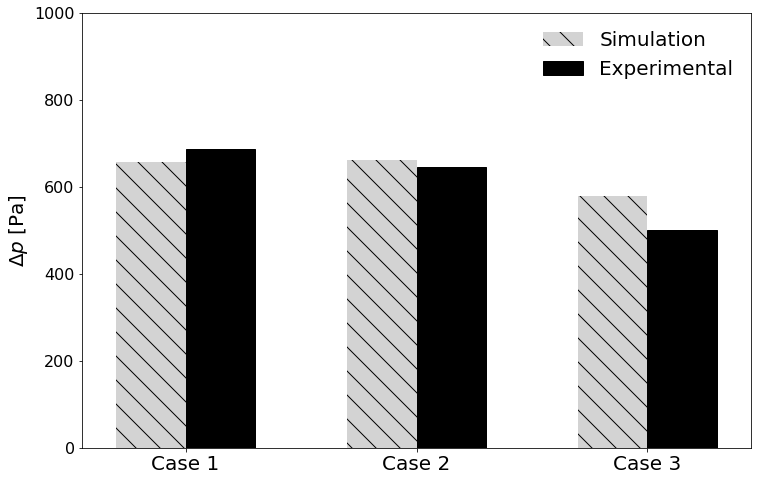

In [19]:
#mean_pressure_drop = [case1_mean_pressure_drop, case2_mean_pressure_drop, case3_mean_pressure_drop]
mean_pressure_drop_alpha11 = [case1_mean_pressure_drop_alpha12, case2_mean_pressure_drop_alpha11, case3_mean_pressure_drop_alpha11]
exp_pressure_drop = [ case1_exp, case2_exp, case3_exp]
width = 0.3
index1 = [1, 2, 3]
index2 = [1+width, 2+width, 3+width]
tick_index = [1+width/2, 2+width/2, 3+width/2]
plt.bar( index1, mean_pressure_drop_alpha11, width = width, color = "lightgrey", hatch="\\", label="Simulation")
plt.bar( index2, exp_pressure_drop, width = width,  edgecolor='black', color = "black",  label="Experimental")
plt.ylabel('$\\Delta p$ [Pa]', fontsize = 20)
plt.xticks(tick_index, ('Case 1', 'Case 2', 'Case 3'), fontsize = 20)
plt.yticks(fontsize = 16)
plt.xlim(index1[0]-width, index2[-1]+width)   
plt.ylim(0, 1000) 
plt.legend(fontsize = 20, frameon = False, loc = 0)
plt.savefig('mean_pressure_drop_comparison.png')
plt.show()
#plt.hist(bins, exp_pressure_drop,  normed = 1, facecolor = 'b')

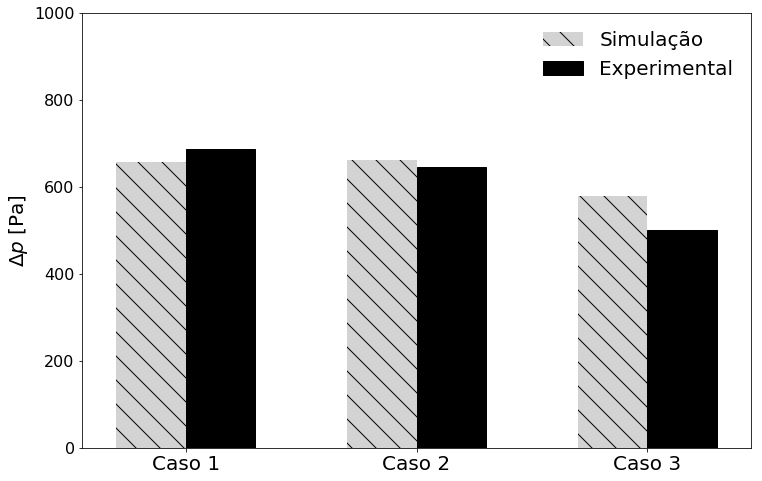

In [20]:
#mean_pressure_drop = [case1_mean_pressure_drop, case2_mean_pressure_drop, case3_mean_pressure_drop]
mean_pressure_drop_alpha11 = [case1_mean_pressure_drop_alpha12, case2_mean_pressure_drop_alpha11, case3_mean_pressure_drop_alpha11]
exp_pressure_drop = [ case1_exp, case2_exp, case3_exp]
width = 0.3
index1 = [1, 2, 3]
index2 = [1+width, 2+width, 3+width]
tick_index = [1+width/2, 2+width/2, 3+width/2]
plt.bar( index1, mean_pressure_drop_alpha11, width = width, color = "lightgrey", hatch="\\", label="Simulação")
plt.bar( index2, exp_pressure_drop, width = width,  edgecolor='black', color = "black",  label="Experimental")
plt.ylabel('$\\Delta p$ [Pa]', fontsize = 20)
plt.xticks(tick_index, ('Caso 1', 'Caso 2', 'Caso 3'), fontsize = 20)
plt.yticks(fontsize = 16)
plt.xlim(index1[0]-width, index2[-1]+width)   
plt.ylim(0, 1000) 
plt.legend(fontsize = 20, frameon = False, loc = 0)
plt.savefig('mean_pressure_drop_comparacao.png')
plt.show()
#plt.hist(bins, exp_pressure_drop,  normed = 1, facecolor = 'b')

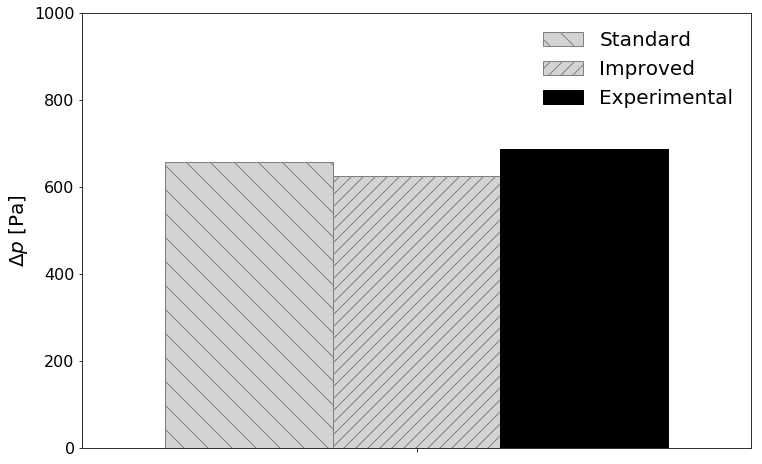

In [21]:
#mean_pressure_drop = [case1_mean_pressure_drop, case2_mean_pressure_drop, case3_mean_pressure_drop]
#mean_pressure_drop = [case1_mean_pressure_drop]
mean_pressure_drop_alpha12 = [case1_mean_pressure_drop_alpha12]
mean_pressure_drop_alpha12i = [case1_mean_pressure_drop_alpha12i_new]
exp_pressure_drop = [case1_exp]
width = 0.3
index1 = [1+width]
index2 = [1+2*width]
index3 = [1+3*width]
index4 = [1+3*width]
#plt.bar( index1, mean_pressure_drop, width = width, edgecolor='grey', color = "grey", hatch="/", label="Simulação antiga")
plt.bar( index1, mean_pressure_drop_alpha12, width = width, edgecolor='grey', color = "lightgrey", hatch="\\", label="Standard")
plt.bar( index2, mean_pressure_drop_alpha12i, width = width, edgecolor='grey', color = "lightgrey", hatch="//", label="Improved")
plt.bar( index3, exp_pressure_drop, width = width,  edgecolor='black', color = "black",  label="Experimental")
plt.ylabel('$\\Delta p$ [Pa]', fontsize = 20)
plt.xticks(index2, (''), fontsize = 20)
plt.yticks(fontsize = 16)
plt.xlim(index1[0]-width, index3[-1]+width)   
plt.ylim(0, 1000) 
plt.legend(fontsize = 20, frameon = False, loc = 0)
plt.savefig('mean_pressure_drop_comparison_alpha12.png')
plt.show()

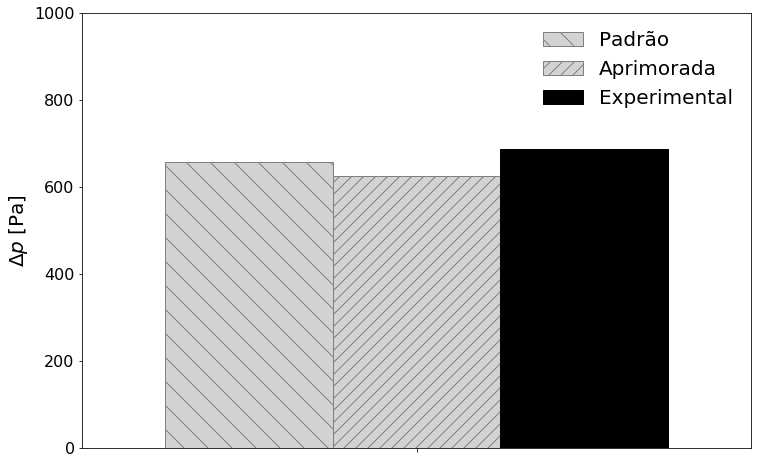

In [31]:
#mean_pressure_drop = [case1_mean_pressure_drop, case2_mean_pressure_drop, case3_mean_pressure_drop]
#mean_pressure_drop = [case1_mean_pressure_drop]
mean_pressure_drop_alpha12 = [case1_mean_pressure_drop_alpha12]
mean_pressure_drop_alpha12i = [case1_mean_pressure_drop_alpha12i_new]
exp_pressure_drop = [case1_exp]
width = 0.3
index1 = [1+width]
index2 = [1+2*width]
index3 = [1+3*width]
index4 = [1+3*width]
#plt.bar( index1, mean_pressure_drop, width = width, edgecolor='grey', color = "grey", hatch="/", label="Simulação antiga")
plt.bar( index1, mean_pressure_drop_alpha12, width = width, edgecolor='grey', color = "lightgrey", hatch="\\", label="Padrão")
plt.bar( index2, mean_pressure_drop_alpha12i, width = width, edgecolor='grey', color = "lightgrey", hatch="//", label="Aprimorada")
plt.bar( index3, exp_pressure_drop, width = width,  edgecolor='black', color = "black",  label="Experimental")
plt.ylabel('$\\Delta p$ [Pa]', fontsize = 20)
plt.xticks(index2, (''), fontsize = 20)
plt.yticks(fontsize = 16)
plt.xlim(index1[0]-width, index3[-1]+width)   
plt.ylim(0, 1000) 
plt.legend(fontsize = 20, frameon = False, loc = 0)
plt.savefig('mean_pressure_drop_comparison_padrão_experimental.png')
plt.show()